In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
chatelet_df = pd.read_csv('chatelet.csv', sep = ';', parse_dates = True)

In [3]:
chatelet_df

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-10-10T02:00:00+02:00,ND,ND,43,508,"18,2","49,1"
1,2022-10-10T01:00:00+02:00,ND,ND,45,529,"18,5","48,4"
2,2022-10-10T00:00:00+02:00,ND,ND,42,547,"18,8","47,1"
3,2022-10-09T23:00:00+02:00,ND,ND,59,614,"19,1","47,2"
4,2022-10-09T22:00:00+02:00,ND,ND,65,637,"19,4","46,3"
...,...,...,...,...,...,...,...
85432,2013-01-01T06:00:00+01:00,4,26,102,622,"21,2","45,9"
85433,2013-01-01T05:00:00+01:00,3,25,85,715,"21,6","45,8"
85434,2013-01-01T04:00:00+01:00,4,27,124,799,"21,8",47
85435,2013-01-01T03:00:00+01:00,6,30,166,800,"21,6","47,3"


# Data Cleaning

In [4]:
chatelet_df.set_index('DATE/HEURE', inplace = True)

In [5]:
chatelet_df = chatelet_df.apply(lambda x: x.replace('ND',np.NaN))

In [6]:
chatelet_df.isna().sum()

NO      28296
NO2     19504
PM10    15330
CO2     15722
TEMP    10712
HUMI    10711
dtype: int64

<AxesSubplot:ylabel='DATE/HEURE'>

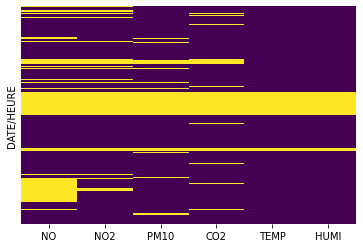

In [7]:
sns.heatmap(chatelet_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
chatelet_df.dropna(axis = 0, how = 'all', inplace = True)

<AxesSubplot:ylabel='DATE/HEURE'>

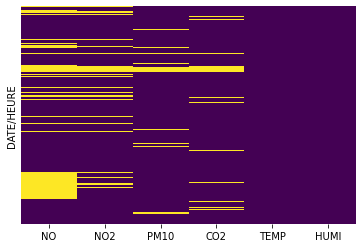

In [9]:
sns.heatmap(chatelet_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
chatelet_df.fillna(method = 'bfill', inplace = True)

<AxesSubplot:ylabel='DATE/HEURE'>

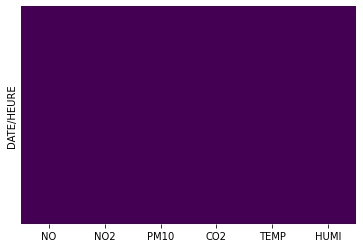

In [11]:
sns.heatmap(chatelet_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
chatelet_df.dtypes

NO      object
NO2     object
PM10    object
CO2     object
TEMP    object
HUMI    object
dtype: object

In [13]:
chatelet_df['HUMI'] = chatelet_df['HUMI'].apply(lambda x: x.replace(',','.'))
chatelet_df['TEMP'] = chatelet_df['TEMP'].apply(lambda x: x.replace(',','.'))

In [14]:
chatelet_df['TEMP'] = chatelet_df['TEMP'].astype(float)
chatelet_df['HUMI'] = chatelet_df['HUMI'].astype(float)


In [15]:
chatelet_df['NO2'] = chatelet_df['NO2'].apply(lambda x: x.replace('<',''))

In [16]:
chatelet_df['NO2'] = chatelet_df['NO2'].astype(float)


In [17]:
chatelet_df['PM10'] = chatelet_df['PM10'].apply(lambda x: x.replace('>',''))
chatelet_df['PM10'] = chatelet_df['PM10'].apply(lambda x: x.replace('<',''))

In [18]:
chatelet_df['PM10'] = chatelet_df['PM10'].astype(float)


In [19]:
chatelet_df['CO2'] = chatelet_df['CO2'].astype(float)


In [20]:
chatelet_df['NO'] = chatelet_df['NO'].apply(lambda x: x.replace('<',''))

In [21]:
chatelet_df['NO'] = chatelet_df['NO'].astype(float)


In [22]:
chatelet_df

,NO,NO2,PM10,CO2,TEMP,HUMI
DATE/HEURE,,,,,,
2022-10-10T02:00:00+02:00,5.0,7.0,43.0,508.0,18.2,49.1
2022-10-10T01:00:00+02:00,5.0,7.0,45.0,529.0,18.5,48.4
2022-10-10T00:00:00+02:00,5.0,7.0,42.0,547.0,18.8,47.1
2022-10-09T23:00:00+02:00,5.0,7.0,59.0,614.0,19.1,47.2
2022-10-09T22:00:00+02:00,5.0,7.0,65.0,637.0,19.4,46.3
...,...,...,...,...,...,...
2013-01-01T06:00:00+01:00,4.0,26.0,102.0,622.0,21.2,45.9
2013-01-01T05:00:00+01:00,3.0,25.0,85.0,715.0,21.6,45.8
2013-01-01T04:00:00+01:00,4.0,27.0,124.0,799.0,21.8,47.0


In [23]:
chatelet_df.dtypes

NO      float64
NO2     float64
PM10    float64
CO2     float64
TEMP    float64
HUMI    float64
dtype: object

# Data transforming

In [24]:
chatelet_df.index = pd.to_datetime(chatelet_df.index, utc = True)

In [25]:
chatelet_df.dtypes

NO      float64
NO2     float64
PM10    float64
CO2     float64
TEMP    float64
HUMI    float64
dtype: object

In [26]:
chatelet_df = chatelet_df.reset_index()
chatelet_df

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-10-10 00:00:00+00:00,5.0,7.0,43.0,508.0,18.2,49.1
1,2022-10-09 23:00:00+00:00,5.0,7.0,45.0,529.0,18.5,48.4
2,2022-10-09 22:00:00+00:00,5.0,7.0,42.0,547.0,18.8,47.1
3,2022-10-09 21:00:00+00:00,5.0,7.0,59.0,614.0,19.1,47.2
4,2022-10-09 20:00:00+00:00,5.0,7.0,65.0,637.0,19.4,46.3
...,...,...,...,...,...,...,...
74945,2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9
74946,2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8
74947,2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0
74948,2013-01-01 02:00:00+00:00,6.0,30.0,166.0,800.0,21.6,47.3


In [27]:
chatelet_df['date'] = pd.to_datetime(chatelet_df['DATE/HEURE'], errors='coerce').dt.date
chatelet_df['time'] = pd.to_datetime(chatelet_df['DATE/HEURE'], errors='coerce').dt.time

In [28]:
chatelet_df.dtypes

DATE/HEURE    datetime64[ns, UTC]
NO                        float64
NO2                       float64
PM10                      float64
CO2                       float64
TEMP                      float64
HUMI                      float64
date                       object
time                       object
dtype: object

In [29]:
chatelet_df['year'] = pd.to_datetime(chatelet_df['date']).dt.year

In [30]:
chatelet_df['day']=pd.to_datetime(chatelet_df['date']).dt.day

In [31]:
chatelet_df['day_name']=pd.to_datetime(chatelet_df['date']).dt.day_name()

In [32]:
chatelet_df['month']=pd.to_datetime(chatelet_df['date']).dt.month

# Clustering

In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

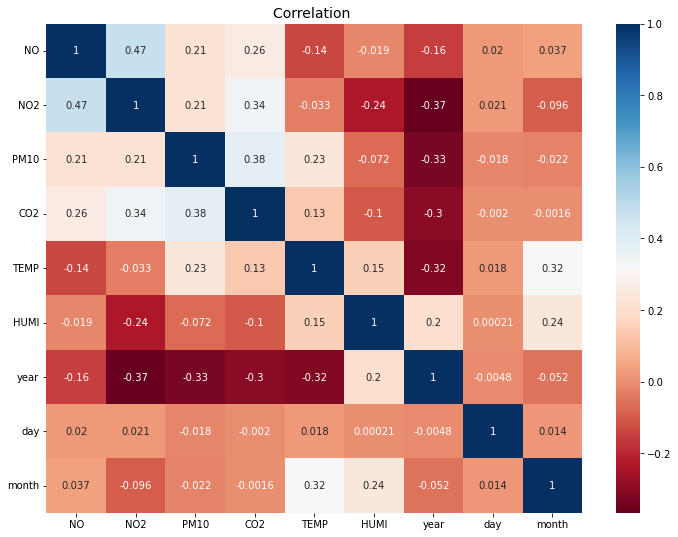

In [35]:
plt.figure(figsize=(12,9))
sns.heatmap(chatelet_df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation ',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [36]:
chatelet_df.head(5)

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI,date,time,year,day,day_name,month
0,2022-10-10 00:00:00+00:00,5.0,7.0,43.0,508.0,18.2,49.1,2022-10-10,00:00:00,2022,10,Monday,10
1,2022-10-09 23:00:00+00:00,5.0,7.0,45.0,529.0,18.5,48.4,2022-10-09,23:00:00,2022,9,Sunday,10
2,2022-10-09 22:00:00+00:00,5.0,7.0,42.0,547.0,18.8,47.1,2022-10-09,22:00:00,2022,9,Sunday,10
3,2022-10-09 21:00:00+00:00,5.0,7.0,59.0,614.0,19.1,47.2,2022-10-09,21:00:00,2022,9,Sunday,10
4,2022-10-09 20:00:00+00:00,5.0,7.0,65.0,637.0,19.4,46.3,2022-10-09,20:00:00,2022,9,Sunday,10


In [62]:
X = chatelet_df[['month','TEMP']]

In [63]:
X

,month,TEMP
0,10,18.2
1,10,18.5
2,10,18.8
3,10,19.1
4,10,19.4
...,...,...
74945,1,21.2
74946,1,21.6
74947,1,21.8
74948,1,21.6


Text(0, 0.5, 'WCSS')

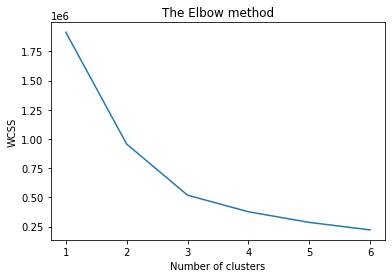

In [64]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [65]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [66]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [67]:
df_cluster= X.copy()
X['Cluster'] = kmeans.labels_

C:\Users\Andreea STROIA\AppData\Local\Temp\ipykernel_12644\1951643354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.labels_


In [68]:
X.head(10)

,month,TEMP,Cluster
0,10,18.2,0
1,10,18.5,0
2,10,18.8,0
3,10,19.1,0
4,10,19.4,0
5,10,19.5,0
6,10,19.5,0
7,10,19.4,0
8,10,19.2,0
9,10,18.5,0


In [72]:
df_cluster1=X.groupby(['Cluster']).mean()
print(df_cluster1['TEMP'])

Cluster
0    19.234569
1    24.653288
2    18.311578
Name: TEMP, dtype: float64


C:\Users\Andreea STROIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


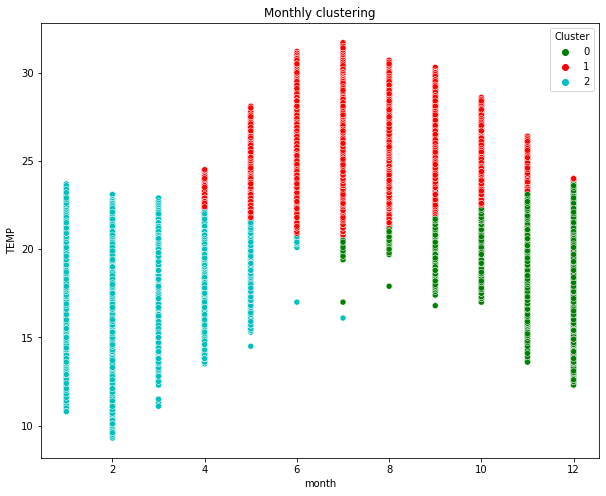

In [76]:
x_axis = X['month']
y_axis = X['TEMP']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = X['Cluster'], palette = ['g', 'r', 'c'])
plt.title('Monthly clustering')
plt.show()

In [77]:
X

,month,TEMP,Cluster
0,10,18.2,0
1,10,18.5,0
2,10,18.8,0
3,10,19.1,0
4,10,19.4,0
...,...,...,...
74945,1,21.2,2
74946,1,21.6,2
74947,1,21.8,2
74948,1,21.6,2


In [81]:
X['Cluster_name']=X['Cluster'].replace(['0','1', '2'], ['Chilly', 'Summery', 'Cold'])

C:\Users\Andreea STROIA\AppData\Local\Temp\ipykernel_12644\1983860601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster_name']=X['Cluster'].replace(['0','1', '2'], ['Chilly', 'Summery', 'Cold'])


In [83]:
X['Cluster_name']=X['Cluster_name'].replace(['0','1','2'], ['Chilly', 'Summery', 'Cold'])

C:\Users\Andreea STROIA\AppData\Local\Temp\ipykernel_12644\1372599101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster_name']=X['Cluster_name'].replace(['0','1', '2'], ['Chilly', 'Summery', 'Cold'])


In [84]:
X

,month,TEMP,Cluster,Cluster_name
0,10,18.2,0,0
1,10,18.5,0,0
2,10,18.8,0,0
3,10,19.1,0,0
4,10,19.4,0,0
...,...,...,...,...
74945,1,21.2,2,2
74946,1,21.6,2,2
74947,1,21.8,2,2
74948,1,21.6,2,2
